https://runestone.academy/runestone/books/published/pythonds/SortSearch/TheSequentialSearch.html

# The Sequential Search
O(n) time complexity since it go one by one
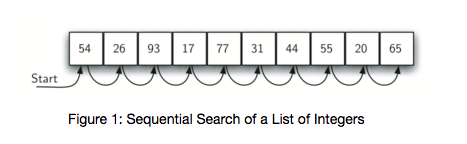

In [1]:
def sequentialSearch(alist, item):
    pos = 0
    found = False

    while pos < len(alist) and not found:
        if alist[pos] == item:
            found = True
        else:
            pos = pos+1

    return found

testlist = [1, 2, 32, 8, 17, 19, 42, 13, 0]
print(sequentialSearch(testlist, 3))
print(sequentialSearch(testlist, 13))

False
True


# The Binary Search
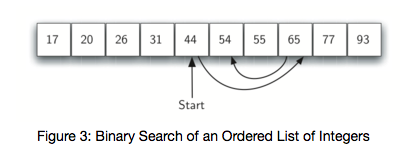

In the recursive solution shown above, the recursive call,

binarySearch(alist[:midpoint],item)

uses the slice operator to create the left half of the list that is then passed to the next invocation (similarly for the right half as well). The analysis that we did above assumed that the slice operator takes constant time. However, we know that the slice operator in Python is actually O(k). This means that the binary search using slice will not perform in strict logarithmic time. Luckily this can be remedied by passing the list along with the starting and ending indices. The indices can be calculated as we did in Listing 3. We leave this implementation as an exercise.

Even though a binary search is generally better than a sequential search, it is important to note that for small values of n, the additional cost of sorting is probably not worth it. In fact, we should always consider whether it is cost effective to take on the extra work of sorting to gain searching benefits. If we can sort once and then search many times, the cost of the sort is not so significant. However, for large lists, sorting even once can be so expensive that simply performing a sequential search from the start may be the best choice.

In [ ]:
def binarySearch(alist, item):
2	    first = 0
3	    last = len(alist)-1
4	    found = False
5	
6	    while first<=last and not found:
7	        midpoint = (first + last)//2
8	        if alist[midpoint] == item:
9	            found = True
10	        else:
11	            if item < alist[midpoint]:
12	                last = midpoint-1
13	            else:
14	                first = midpoint+1
15	
16	    return found

In [1]:
1	def binarySearch(alist, item):
2	    if len(alist) == 0:
3	        return False
4	    else:
5	        midpoint = len(alist)//2
6	        if alist[midpoint]==item:
7	          return True
8	        else:
9	          if item<alist[midpoint]:
10	            return binarySearch(alist[:midpoint],item)
11	          else:
12	            return binarySearch(alist[midpoint+1:],item)
13	
14	testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42,]
15	print(binarySearch(testlist, 3))
16	print(binarySearch(testlist, 13))

SyntaxError: invalid syntax (<ipython-input-1-adb0bf6d3213>, line 1)

# Hashing

Hash function map input to an index: for example... using the remainder by dividing by length -> N/11
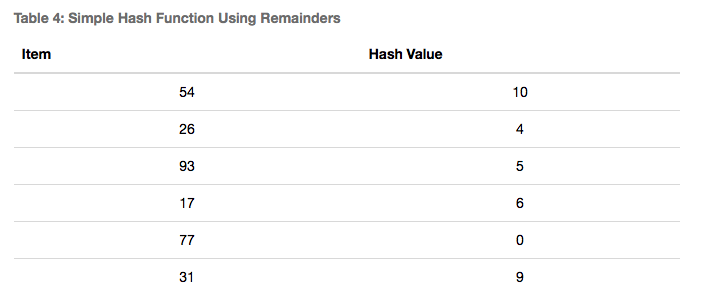

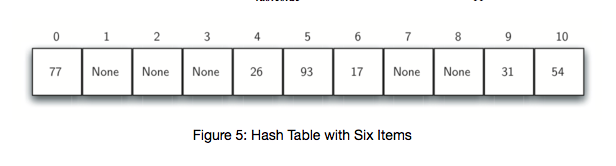

You can probably already see that this technique is going to work only if each item maps to a unique location in the hash table. For example, if the item 44 had been the next item in our collection, it would have a hash value of 0 (44%11==0). Since 77 also had a hash value of 0, we would have a problem. According to the hash function, two or more items would need to be in the same slot. This is referred to as a collision (it may also be called a “clash”). Clearly, collisions create a problem for the hashing technique. We will discuss them in detail later.

### Implementing the Map Abstract Data Type

In [2]:
class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size
                
    def put(self,key,data):
      hashvalue = self.hashfunction(key,len(self.slots))

      if self.slots[hashvalue] == None:
        self.slots[hashvalue] = key
        self.data[hashvalue] = data
      else:
        if self.slots[hashvalue] == key:
          self.data[hashvalue] = data  #replace
        else:
          nextslot = self.rehash(hashvalue,len(self.slots))
          while self.slots[nextslot] != None and \
                          self.slots[nextslot] != key:
            nextslot = self.rehash(nextslot,len(self.slots))

          if self.slots[nextslot] == None:
            self.slots[nextslot]=key
            self.data[nextslot]=data
          else:
            self.data[nextslot] = data #replace

    def hashfunction(self,key,size):
         return key%size

    def rehash(self,oldhash,size):
        return (oldhash+1)%size

    def get(self,key):
      startslot = self.hashfunction(key,len(self.slots))

      data = None
      stop = False
      found = False
      position = startslot
      while self.slots[position] != None and  \
                           not found and not stop:
         if self.slots[position] == key:
           found = True
           data = self.data[position]
         else:
           position=self.rehash(position,len(self.slots))
           if position == startslot:
               stop = True
      return data

    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)

In [3]:
H=HashTable()
H[54]="cat"
H[26]="dog"
H[20]="chicken"
H.slots
H.data

[None, None, None, None, 'dog', None, None, None, None, 'chicken', 'cat']

O(1) if no colision occurs.